# Coordinate Transformation with PyIRI (Without ApexPy)

A more natural coordinate system—particularly for representing horizontal ionospheric structures—is the **Quasi-Dipole Latitude and Magnetic Local Time (QD-MLT)** system, introduced by [Richmond, 1995](https://doi.org/10.1029/95JA00466).  
This system is designed to align with Earth's magnetic field geometry while maintaining globally continuous and quasi-orthogonal coordinates.

The QD latitude $\lambda_q$ (with corresponding co-latitude $\theta_q$) and longitude $\phi_q$ are derived from Apex coordinates as:

$$
\begin{aligned}
\theta_q &= \frac{\pi}{2} - \lambda_q = \pm \arccos\left(\sqrt{\frac{R_E + h}{R_E + h_A}}\right) \\
\phi_q &= \phi_A
\end{aligned}
$$

Where:  
- $R_E$ is the Earth's mean radius (6,371 km),  
- $h$ is the altitude of interest,  
- $h_A$ is the Apex height (intersection of the field line with the magnetic equator),  
- $\phi_A$ is the Apex longitude.

**Magnetic Local Time (MLT)** is computed using the QD longitude of the point of interest $\phi_q$ and the QD longitude of the subsolar point $\phi_s(t)$ at time $t$:

$$
\begin{aligned}
\text{MLT} &= \left[\frac{\phi_q - \phi_s(t) + 180}{15}\right] \mod 24 \\
\phi_{\text{MLT}} &= \text{MLT} \times 15
\end{aligned}
$$

In QD-MLT coordinates:
- The magnetic equator is fixed at $0^\circ$ latitude,  
- Ionospheric structures are much more stable with respect to UT,  
- Fewer spherical harmonic terms are needed to represent the same structures.

---

## Why Not ApexPy?

While the APEX coordinate transformation is traditionally performed using the APEX Fortran library (or its Python wrapper, ApexPy), no pure Python implementation exists.

To stay true to PyIRI’s pure-Python philosophy and avoid non-portable compiled dependencies, this tutorial demonstrates how to use **PyIRI’s spherical harmonic-based approximation** to perform GEO ↔ QD transformations *without* ApexPy.

This method:
- Uses precomputed spherical harmonic coefficients stored in NetCDF files,  
- Supports years from 1900 to 2025,  
- Achieves accurate QD coordinate transformation with errors < 3°,  
- Fully supports QD-MLT conversion via subsolar point calculation.

The following cells will show how to:
- Convert a grid of geographic coordinates to QD,  
- Convert a grid of QD coordinates back to geographic,  
- Visualize the results.

---

## NOTE

This method uses spherical harmonic reconstruction and may introduce small discrepancies around the magnetic poles. These are expected and are well within acceptable tolerance for climatological studies.



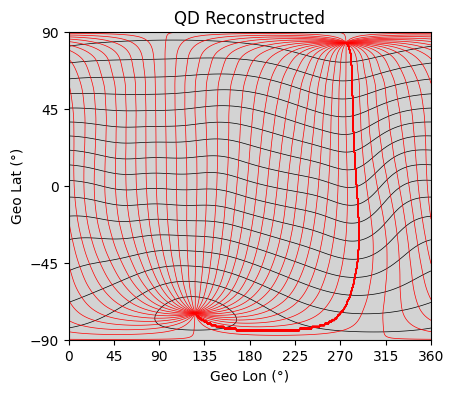

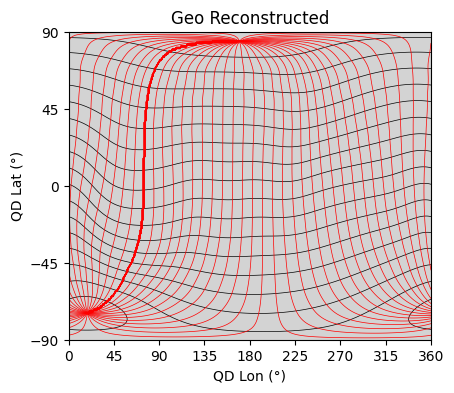

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from PyIRI.sh_library import Apex

# Define datetime object
dtime = dt.datetime(year=2020, month=1, day=1)

# Define the geo grid that you wish to be transformed to the Quasi-Dipole cooedinates
ddeg = 1
aLon = np.arange(0, 360 + ddeg, ddeg)
aLat = np.arange(90, -90 - ddeg, -ddeg)
Lon_in, Lat_in = np.meshgrid(aLon, aLat)

# Call Apex function
QDLat, QDLon = Apex(Lat_in, Lon_in, dtime, transform_type='GEO_2_QD')

# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
fig.subplots_adjust(right=0.85)
ax_plot = ax
ax_plot.set_facecolor('lightgray')
ax_plot.contour(Lon_in, Lat_in, QDLat, levels=np.arange(-90, 90, 10), colors='black', linestyles='solid', linewidths=0.5)
ax_plot.contour(Lon_in, Lat_in, QDLon, levels=np.arange(0, 360, 10), colors='red', linestyles='solid', linewidths=0.5)
ax_plot.set_title('QD Reconstructed')
ax_plot.set_xlim([0, 360])
ax_plot.set_ylim([-90, 90])
ax_plot.set_xticks(np.arange(0, 360 + 45, 45))
ax_plot.set_yticks(np.arange(-90, 90 + 45, 45))
ax_plot.set_xlabel('Geo Lon (°)')
ax_plot.set_ylabel('Geo Lat (°)')

# Define the QD grid that you wish to be transformed to the Geo cooedinates
ddeg = 1
aQDLon = np.arange(0, 360 + ddeg, ddeg)
aQDLat = np.arange(90, -90 - ddeg, -ddeg)
QDLon_in, QDLat_in = np.meshgrid(aQDLon, aQDLat)

# Call Apex function
GeoLat, GeoLon = Apex(QDLat_in, QDLon_in, dtime, transform_type='QD_2_GEO')

# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
fig.subplots_adjust(right=0.85)
ax_plot = ax
ax_plot.set_facecolor('lightgray')
ax_plot.contour(QDLon_in, QDLat_in, GeoLat, levels=np.arange(-90, 90, 10), colors='black', linestyles='solid', linewidths=0.5)
ax_plot.contour(QDLon_in, QDLat_in, GeoLon, levels=np.arange(0, 360, 10), colors='red', linestyles='solid', linewidths=0.5)
ax_plot.set_title('Geo Reconstructed')
ax_plot.set_xlim([0, 360])
ax_plot.set_ylim([-90, 90])
ax_plot.set_xticks(np.arange(0, 360 + 45, 45))
ax_plot.set_yticks(np.arange(-90, 90 + 45, 45))
ax_plot.set_xlabel('QD Lon (°)')
ax_plot.set_ylabel('QD Lat (°)')

# Save to file
plt.savefig('../figures/Apex_Coordinate_Transformation.png') 